# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single DataFrame
#merged_df = mouse_metadata.merge(study_results,how='outer',on='Mouse ID')
merged_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [20]:
# Checking the number of mice.
mouse_count = len(merged_df['Mouse ID'].unique())
mouse_count

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
#dup_mice
dup_mice_id = merged_df.loc[dup_mice, 'Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_all_data = merged_df.loc[merged_df['Mouse ID'] == dup_mice_id[0]]
dup_mice_all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = merged_df.drop(dup_mice_all_data.index)
clean_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [28]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(merged_df['Mouse ID'].unique())
mouse_count_clean



249

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = clean_mice_df.groupby('Drug Regimen')

mice_per_regimen = drug_regimen_df['Mouse ID'].count().sort_values(ascending=False)
#mice_per_regimen
#drug_regimen_df
reg_mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
#reg_mean
reg_median = drug_regimen_df["Tumor Volume (mm3)"].median()
reg_variance = drug_regimen_df["Tumor Volume (mm3)"].var()
reg_stdev = drug_regimen_df["Tumor Volume (mm3)"].std()
reg_sem = drug_regimen_df["Tumor Volume (mm3)"].sem()
#reg_sem




In [34]:
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean':reg_mean,'Median':reg_median, 'Variance': reg_variance, 'Std Dev': reg_stdev, 'SEM':reg_sem})
summary_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = drug_regimen_df['Tumor Volume (mm3)'].agg([
    'mean',
    'median',
    'var',
    'std',
    'sem'
])

#summary_agg_df

#have to rename them now, table reverted to data name ('std', etc)
summary_agg_df = summary_agg_df.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Std Dev',
    'sem': 'SEM'
})

summary_agg_df



,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Data Rows for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Rows'>

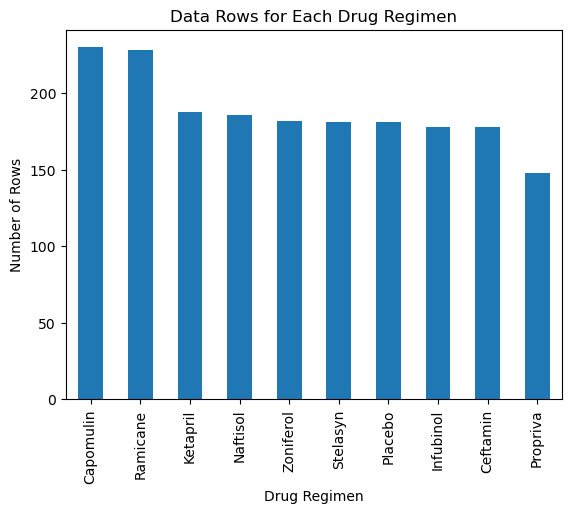

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Use .plot.typeofplot()

pandas_bar = clean_mice_df['Drug Regimen'].value_counts().plot.bar()
#pandas_bar

pandas_bar.set_title("Data Rows for Each Drug Regimen")
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Rows")
pandas_bar




In [49]:
# Apply labels so people can read graph

# pandas_bar.set_title("Data Rows for Each Drug Regimen")
# pandas_bar.set_xlabel("Drug Regimen")
# pandas_bar.set_ylabel("Number of Rows")
# pandas_bar

# NOTE:  Apparently this has to be done in same code block as plot is described, so see above block

<Axes: title={'center': 'Data Rows for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Rows'>

<function matplotlib.pyplot.show(close=None, block=None)>

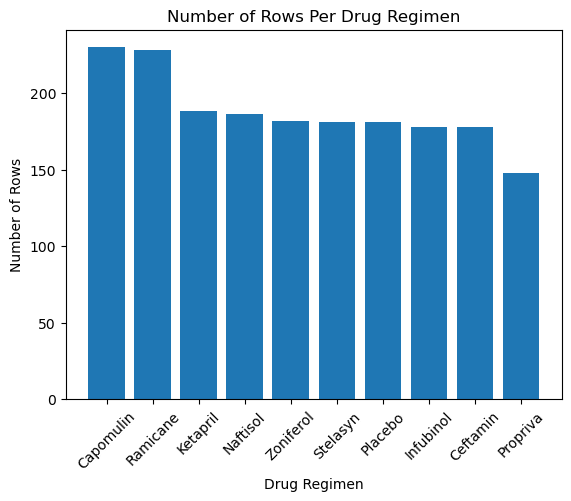

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Use .plt
#pyplot_bar = clean_mice_df['Drug Regimen'].value_counts()
rows = clean_mice_df['Drug Regimen'].value_counts()
# hints in homework assignment say to think about how to sort data to display.
# so we want to sort largest bar to smallest
x_axis = np.arange(len(rows))  #this 'arange' works like 'range' in python, like counting rows per regimen

plt.bar(x_axis,rows)
#plt.show

# Add tick marks
tick_locations = [x_value for x_value in x_axis]  #one tick per bar on x axis
plt.xticks(tick_locations, rows.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=45)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.title('Number of Rows Per Drug Regimen')
plt.show



<Axes: ylabel='Sex'>

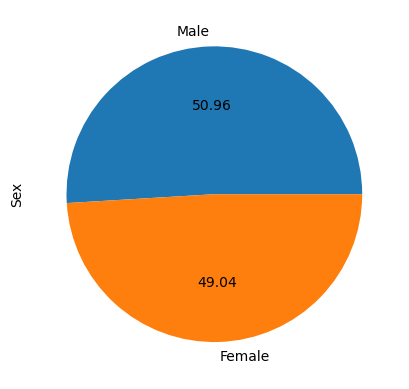

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#count them first
mouse_sex = clean_mice_df.groupby('Sex')['Sex'].count()

mouse_sex = clean_mice_df['Sex'].value_counts().plot.pie(autopct= '%.2f')

#autopct example here:
#https://stackoverflow.com/questions/69882957/how-to-surpress-some-autopct-values-plotted-on-a-pie-plot

mouse_sex

<function matplotlib.pyplot.show(close=None, block=None)>

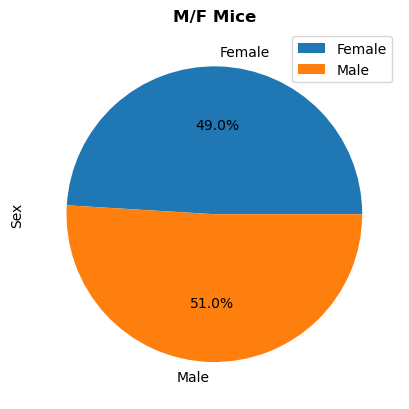

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_mouse_sex = mouse_sex.plot(kind='pie', autopct='%1.1f%%')
#formatting for showing % in pie chart:
#https://stackoverflow.com/questions/34765236/displaying-numbers-with-legend-on-pie-chart-tkinter-pyplot-matplotlib


pie_mouse_sex.set_title(label='M/F Mice', fontweight = 'bold')
pie_mouse_sex.legend()
plt.tight_layout

#plt.pie(autopct='%1.1f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_df.groupby(['Drug Regimen', 'Mouse ID']).max()['Timepoint']
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df
#last_timepoint = clean_mice_df.groupby(['Drug Regimen', 'Mouse ID']).last([['Timepoint', 'Tumor Volume (mm3)']])
#last_timepoint
#lt_df = pd.DataFrame{clean_mice_df['Drug Regimen','Mouse ID','']}
#last_timepoint( 'Tumor Volume (mm3)')
#last_timepoint( 'Timepoint','Tumor Volume (mm3)')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_df = pd.merge(last_timepoint_df,clean_mice_df,on=('Mouse ID', 'Timepoint'),how='left')
tumor_volume_df.head(30)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_final = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #drug_reg = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    drug_reg = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    drug_reg

    #tumor_vol_final_df = drug_reg
       # Create a series that consists of all final volume values for each regimen
    #values = drug_reg['Tumor Volume (mm3)']
    #drug_values.append(values)
    # add subset 
    #tumor_vol_final = drug_reg["Tumor Volume (mm3)"]
    tumor_vol_final.append(drug_reg)
    #tumor_vol_final
    
    # Determine outliers using upper and lower bounds
    # If the data is in a dataframe, we use pandas to give quartile calculations
    #quartiles = tumor_vol_final['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    quartiles = tumor_volume_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

   #  print(f"The lower quartile of tumor_vol_final is: {lowerq}")
   #  print(f"The upper quartile of tumor_vol_final is: {upperq}")
    print(f"The interquartile range of tumor_vol_final is: {iqr}")
   #  print(f"The the median of tumor_vol_final is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{treatment} Regimen")
    print(f"Final tumor volume(mm3) for {treatment} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {treatment} above {round(upper_bound,2)} could be outliers.")


The interquartile range of tumor_vol_final is: 19.177757257500012
Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 17.11 could be outliers.
Final tumor volume(mm3) for Capomulin above 93.82 could be outliers.
The interquartile range of tumor_vol_final is: 19.177757257500012
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.11 could be outliers.
Final tumor volume(mm3) for Ramicane above 93.82 could be outliers.
The interquartile range of tumor_vol_final is: 19.177757257500012
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 17.11 could be outliers.
Final tumor volume(mm3) for Infubinol above 93.82 could be outliers.
The interquartile range of tumor_vol_final is: 19.177757257500012
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 17.11 could be outliers.
Final tumor volume(mm3) for Ceftamin above 93.82 could be outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

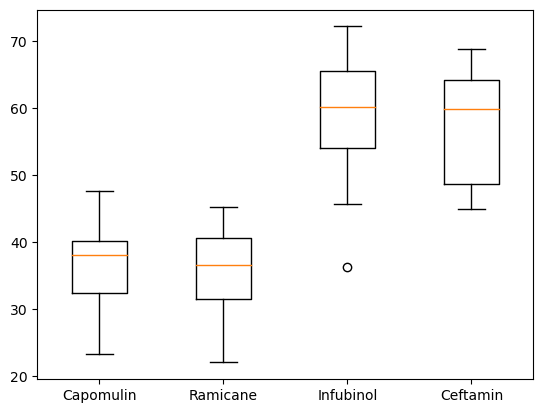

In [128]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_final)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

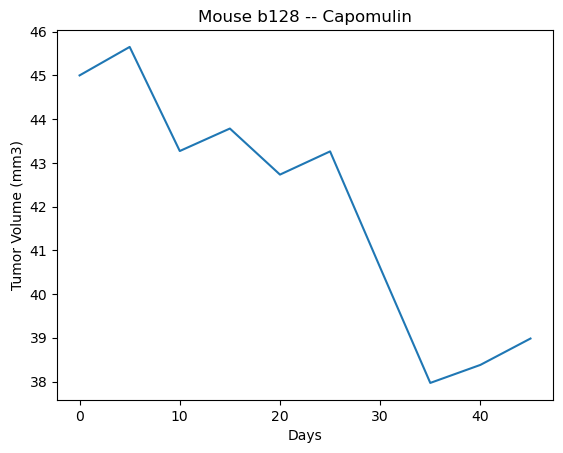

In [131]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#mouse_b128 = plt.plot()
mouse = clean_mice_df.loc[clean_mice_df['Mouse ID'] == 'b128']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse b128 -- Capomulin")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

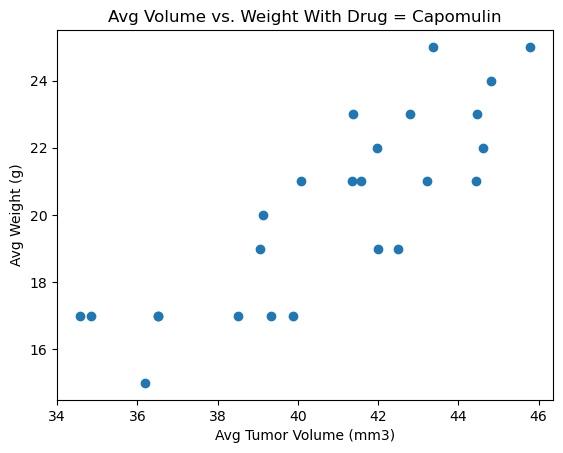

In [137]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin']

avg_vol = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_wt = capo_df.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(avg_vol,avg_wt)

plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Avg Weight (g)')
plt.title('Avg Volume vs. Weight With Drug = Capomulin')
plt.show


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


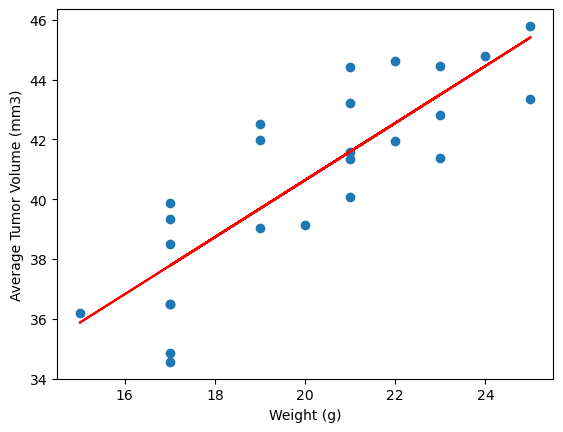

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
